In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [43]:
np.random.seed(23)
noise = np.random.randint(1,20,100)
x= np.random.randint(1,100,100)
y =4 + 3*x + noise

In [75]:
kfold = KFold(n_splits=6,shuffle=True,random_state=23)

In [79]:
for index_x_train,index_x_test in kfold.split(x):
    x_train,x_test = x[index_x_train],x[index_x_test]
    y_train,y_test = y[index_x_train],y[index_x_test]


In [82]:
print(len(x_train))
print(len(x_test))

84
16


In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x_test.reshape(-1, 1), y)

LinearRegression()

In [47]:
result = cross_val_score(lr,x.reshape(-1,1),y,cv=kfold)
avres = np.mean(result)

In [48]:
ycap = lr.predict(x.reshape(-1, 1))

In [63]:
mse1 = mse(y, ycap)
print(mse1)

27.21273600615526


In [55]:
ravlin = avres
print(ravlin)

0.9955070304078042


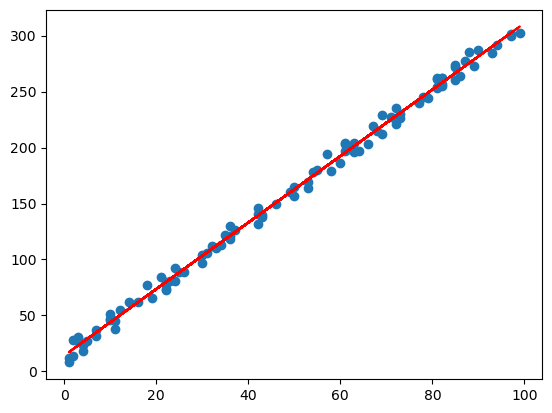

In [56]:
plt.scatter(x, y)
plt.plot(x, ycap, c='red')
plt.show()

In [83]:
ridge = Ridge(alpha =1)
result = cross_val_score(ridge,x_train.reshape(-1,1),y_train,cv=kfold)
mscore = np.mean(result)
print(mscore)

0.9956664965350881


In [84]:
ridge.fit(x_train.reshape(-1, 1), y_train)

Ridge(alpha=1)

In [85]:
ycrp = ridge.predict(x_test.reshape(-1, 1))

In [86]:
mse2 = mse(y_test, ycrp)
print(mse2)

27.645543163218207


In [87]:
#diff
print(mse2 - mse1)

0.43280715706294615


In [15]:
mscores = []

alphas = np.linspace(30,60,1000)
for i in alphas:
    ridge = Ridge(alpha =i)
    result = cross_val_score(ridge,x_test.reshape(-1,1),y_test,cv=kfold)
    mscores.append(np.mean(result))

print("max score",np.max(mscores))
print("best alpha", alphas[np.argmax(mscores)])

max score 0.9959554304982641
best alpha 48.73873873873874


In [ ]:
for i in alphas:
    lasso = Lasso(alpha=i)
    

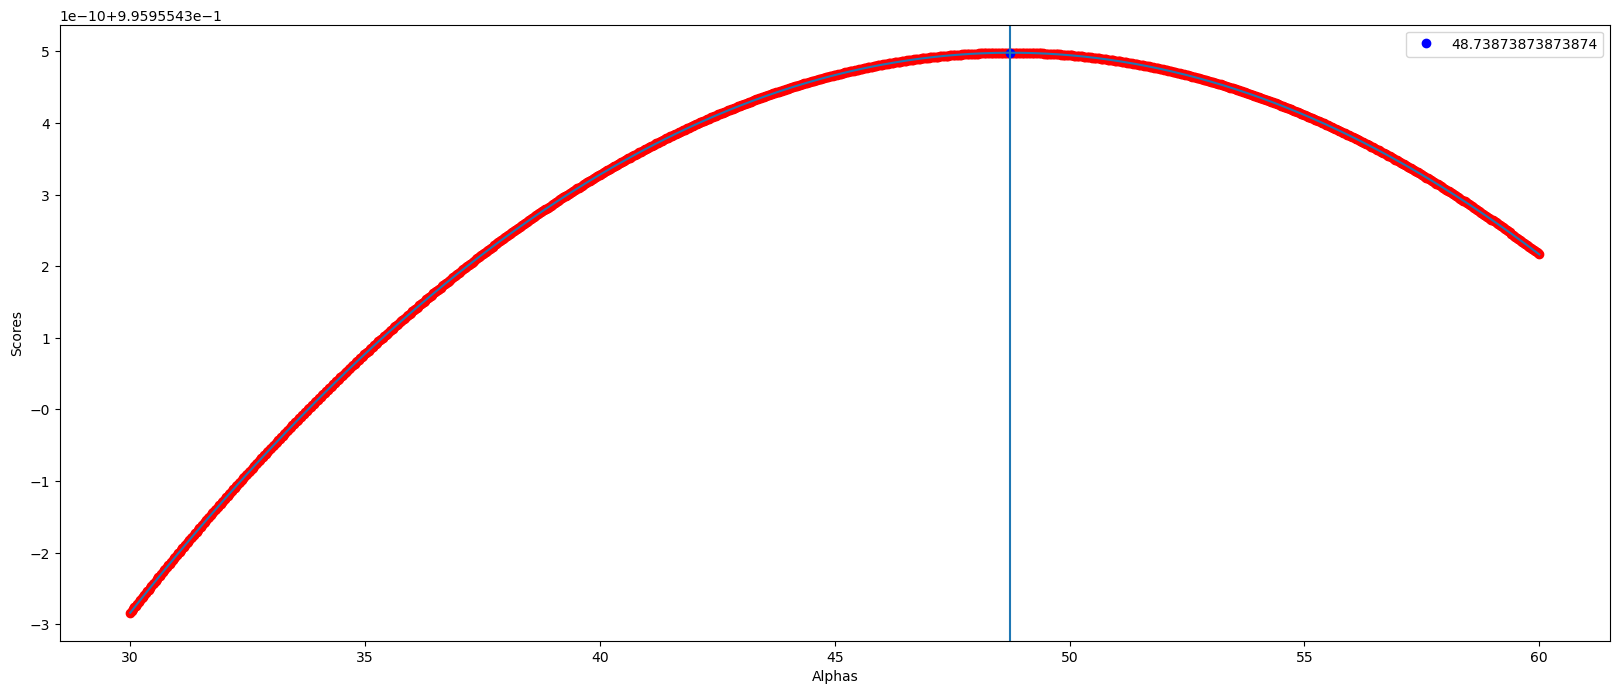

In [28]:
plt.figure(figsize=(20,8))
plt.plot(alphas[np.argmax(mscores)],np.max(mscores),'bo',label=alphas[np.argmax(mscores)])
plt.legend()
plt.plot(alphas,mscores)
plt.scatter(alphas,mscores,c='red')
plt.axvline(alphas[np.argmax(mscores)])
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()